In [1]:
import pickle as pk

arr = pk.load(open('/home/lscsc/caizhijie/0420-wamera-benchmark/validdumps.pk', 'rb'))

/home/lscsc/caizhijie/miniconda3/envs/mtmd/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
arr[0]

'i, loss_sm, loss_jhm, loss_paf, sm, jhm, paf, y_sm, y_jhm, y_paf, img, box'

In [3]:
loss_sm_list = list()
loss_jhm_list = list()
loss_paf_list = list()
sm_list = list()
jhm_list = list()
paf_list = list()
y_sm_list = list()
y_jhm_list = list()
y_paf_list = list()
box_list = list()

for i in arr[1:]:
    loss_sm_list.append(i[1])
    loss_jhm_list.append(i[2])
    loss_paf_list.append(i[3])
    sm_list.extend(i[4])
    jhm_list.extend(i[5])
    paf_list.extend(i[6])
    y_sm_list.extend(i[7])
    y_jhm_list.extend(i[8])
    y_paf_list.extend(i[9])
    box_list.extend(i[10])

In [7]:
import numpy as np
import sys

sys.path.append('../src')

import utils

n_color = 19
colors, hls = utils.ncolors(n_color)
colors[18] = [0, 0, 0]

jhm_arr = np.stack(jhm_list)
y_jhm_arr = np.stack(y_jhm_list)

In [8]:
y_jhm_arr.shape

(6400, 38, 46, 46)

In [5]:
import matplotlib.pyplot as plt


def read_jhm(idx):
    fig, ax = plt.subplots(1, 2)
    thisarr = jhm_arr[idx, ...]
    thisyarr = y_jhm_arr[idx, ...]
    thisarr = thisarr / thisarr.sum(0)
    thisyarr = thisyarr / thisyarr.sum(0)
    visarr = np.matmul(thisarr.transpose(1, 2, 0), np.array(colors) / 255)
    visyarr = np.matmul(thisyarr.transpose(1, 2, 0), np.array(colors) / 255)
    
    ax[0].imshow(visarr)
    ax[1].imshow(visyarr)
    
    return fig, ax

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 19 is different from 38)

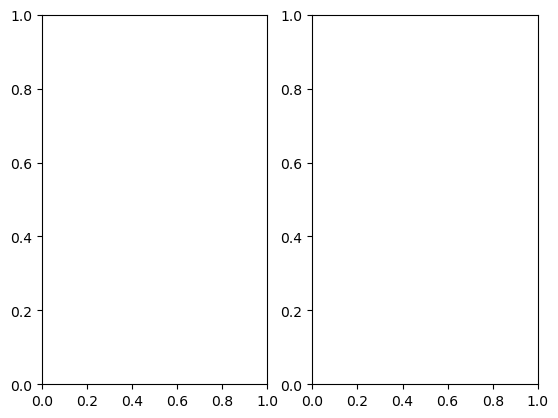

In [10]:
fig, ax = read_jhm(9)
ax.imshow()